In [1]:
import draw2Svg as dw

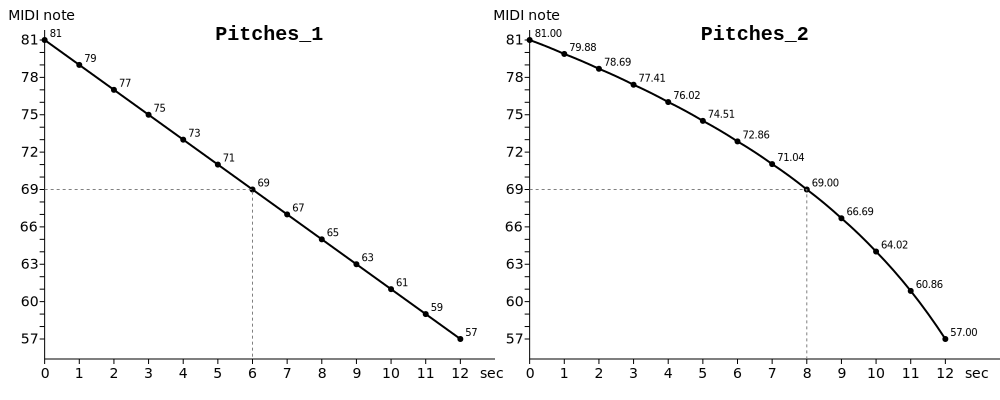

In [81]:
w,h = 1000,400
d = dw.Drawing(w,h)

def grid(num,length=800,margin_1=40,margin_2=41):
    """returns a list of num grid values between
    margin_1 and height-margin_2 which are subtracted from length.
    for horizontal, it counts from left to right
    for vertical, it counts from top to bottom"""
    real_length = length - margin_1 - margin_2
    grid_step = real_length / (num-1)
    return [i*grid_step+margin_1 for i in range(num)]

def tick(x,y,leng=-5,**args):
    """axes tick
    leng negative means from x,y to left
    leng positive menas to bottom"""
    if leng<0: d.append(dw.Line(x,y,x+leng,y,**args))
    else: d.append(dw.Line(x,y,x,y+leng,**args))

def scale(inval,inmin,inmax,outmin,outmax):
    """scales inval which is between inmin and inmax
    to the range between outmin and outmax"""
    return (inval-inmin)*((outmax-outmin)/(inmax-inmin))+outmin

# grids and y range
x_grid = grid(29,w,10,20)
y_grid = grid(5,h)
yrange_max = y_grid[0]
yrange_min = y_grid[4]-20
def Midi(midinn):
    """returns the y position for a midi note number input"""
    return scale(midinn,57,81,yrange_min,yrange_max)

# axes
zero_left = x_grid[1],y_grid[4]
zero_right = x_grid[15],y_grid[4]
d.append(dw.Line(*zero_left,x_grid[14],y_grid[4],stroke='black'))
d.append(dw.Line(*zero_left,x_grid[1],y_grid[0]-10,stroke='black'))
d.append(dw.Line(*zero_right,w,y_grid[4],stroke='black'))
d.append(dw.Line(*zero_right,x_grid[15],y_grid[0]-10,stroke='black'))

# ticks and text for axes
size = 14
y_text = [i for i in range(81,56,-1)]
x_text = ['%d'%i for i in range(13)]
for i,num in enumerate(y_text):
    y = Midi(num)
    tick(x_grid[1],y,stroke='black')
    tick(x_grid[15],y,stroke='black')
    if i%3==0:
        d.append(dw.Text('%d'%num,size,x_grid[1]-7,y-1,text_anchor='end',valign='middle'))
        d.append(dw.Text('%d'%num,size,x_grid[15]-7,y-1,text_anchor='end',valign='middle'))
for i,num in enumerate(x_text):
    tick(x_grid[i+1],y_grid[4],5,stroke='black')
    d.append(dw.Text(num,size,x_grid[i+1],y_grid[4]+5,text_anchor='middle',valign='top'))
    tick(x_grid[i+15],y_grid[4],5,stroke='black')
    d.append(dw.Text(num,size,x_grid[i+15],y_grid[4]+5,text_anchor='middle',valign='top'))
d.append(dw.Text('MIDI note',size,x_grid[1]-3,y_grid[0]-20,text_anchor='middle'))
d.append(dw.Text('MIDI note',size,x_grid[15]-3,y_grid[0]-20,text_anchor='middle'))
d.append(dw.Text('sec',size,x_grid[14]-15,y_grid[4]+5,valign='top'))
d.append(dw.Text('sec',size,x_grid[28]-15,y_grid[4]+5,valign='top'))

# points
pch1 = [i for i in range(81,56,-2)]
pch2 = [81,79.88,78.69,77.41,76.02,74.51,72.86,71.04,69,66.69,64.02,60.86,57]
psiz = 3
xfreqs1 = []
yfreqs1 = []
tsiz = 10
for i in range(13):
    y = Midi(pch1[i])
    d.append(dw.Circle(x_grid[i+1],y,psiz))
    d.append(dw.Text('%d'%pch1[i],tsiz,x_grid[i+1]+5,y-3))
    y = Midi(pch2[i])
    d.append(dw.Circle(x_grid[i+15],y,psiz))
    d.append(dw.Text('%.2f'%pch2[i],tsiz,x_grid[i+15]+5,y-3))

# line for pch1
d.append(dw.Line(x_grid[1],Midi(81),x_grid[13],Midi(57),stroke='black',stroke_width=2))

# curve for pch2
#dx = xfreqs1[1] - xfreqs1[0]
p = dw.Path(stroke='black',fill='none',stroke_width=2)
p.M(x_grid[15],Midi(81))
dx = x_grid[1]-x_grid[0]
for i in range(12):
    dy = Midi(pch2[i+1]) - Midi(pch2[i])
    p.Q(x_grid[i+15]+dx/2,Midi(pch2[i])+dy*.45,x_grid[i+16],Midi(pch2[i+1]))
d.append(p)

# final text
big = 20
d.append(dw.Text('Pitches_1',big,x_grid[1]+(x_grid[14]-x_grid[1])/2,y_grid[0],
                 text_anchor='middle',font_family='courier',font_weight='bold'))
d.append(dw.Text('Pitches_2',big,x_grid[15]+(x_grid[28]-x_grid[15])/2,y_grid[0],
                 text_anchor='middle',font_family='courier',font_weight='bold'))

# dotted lines at 6 and 8 seconds
d.append(dw.Lines(x_grid[1],Midi(69),x_grid[7],Midi(69),x_grid[7],y_grid[4],
                  fill='none',stroke='gray',stroke_dasharray='3 3'))
d.append(dw.Lines(x_grid[15],Midi(69),x_grid[23],Midi(69),x_grid[23],y_grid[4],
                  fill='none',stroke='gray',stroke_dasharray='3 3'))

d.savePng('../../images/01-GS-05-c.png')
d